<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/Imbalanced_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("")
df_train

target_count = df_train.target.value_counts()
print("Class 0:",target_count[0])
print("Class 1:",target_count[1])
print("Proportion of Class 0 is", round(target_count[0]*100/(target_count[1]+target_count[0]),2),"%")
target_count.plot(kind = 'bar', title = "count(taret)");

Masked dataset: There will be no description on the column details.

In [ ]:
df_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = df_train.columns[2:]
df_train = df_train.dropna()

X = df_train[labels]
y= df_train['target']

X_trian, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy = ", Accuracy*100)


Checking the accuracy rate with an randomly chosed single feature. The result is coming higher than the accuracy of all the features together. This is where I start to doubt on Accuracy obtained

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train[['ps_ind_04_cat']],y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy = ", Accuracy*100)


From the confusion matrix, i found that model predicts only one class.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model.predict_proba(X_test[["ps_ind_04_cat"]])[:,1])

In [4]:
!pip install imblearn #Imblearn is an package to handle Imbalanced dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import imblearn

In [7]:
from sklearn.datasets import make_classification
import pandas as pd

X,y = make_classification(
    n_classes = 2, class_sep = 0.75, weights = [0.9,0.1],
    n_informative = 2, n_redundant = 0, flip_y = 0,
    n_features =2,n_clusters_per_class =2,
    n_samples =200, random_state=10
)
df =pd.DataFrame(X)
df["target"] = y
df

,0,1,target
0,0.157423,-0.374667,0
1,-0.909752,0.037925,0
2,-0.944869,-1.136125,0
3,-0.883279,-1.362500,0
4,-0.022943,1.015924,0
...,...,...,...
195,-0.272900,0.923791,0
196,-0.880549,-0.633844,0
197,-1.186294,0.943099,0
198,-1.158688,-0.399660,0


In [21]:
df.groupby("target")[0].count()

target
0    180
1     20
Name: 0, dtype: int64

<Axes: title={'center': 'Count(target)'}>

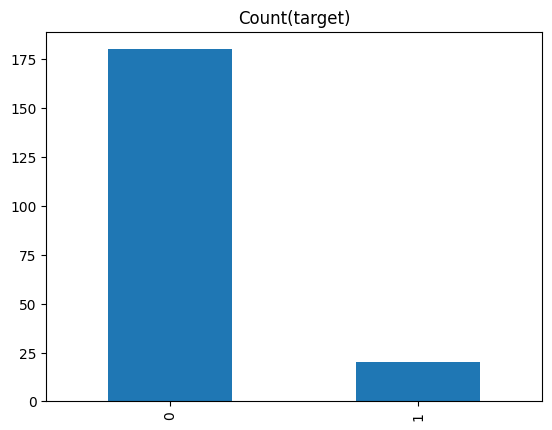

In [9]:
df.target.value_counts().plot(kind = 'bar', title = "Count(target)")

In [33]:
def plot_2d_space(X,y, label = 'Classes'):
    colors = ["#1F77B4", "#FF7F0E"]
    markers = ["o","s"]
    for l,c,m in zip(np.unique(y), colors, markers):
      plt.scatter(
        X[y==l, 0],
        X[y==l, 1],
        c=c, label=1, marker=m
    )
    plt.title(label)
    plt.legend(loc="upper right")
    plt.show()



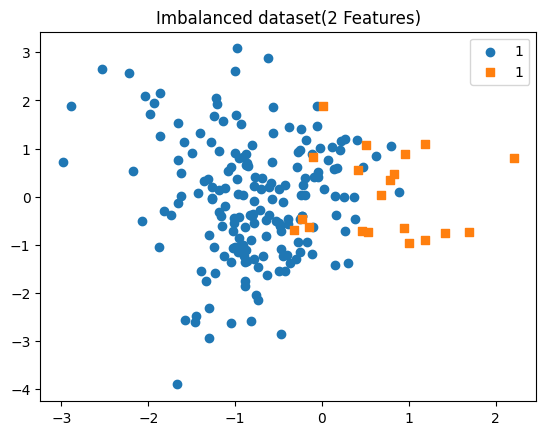

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plot_2d_space(X, y,'Imbalanced dataset(2 Features)')

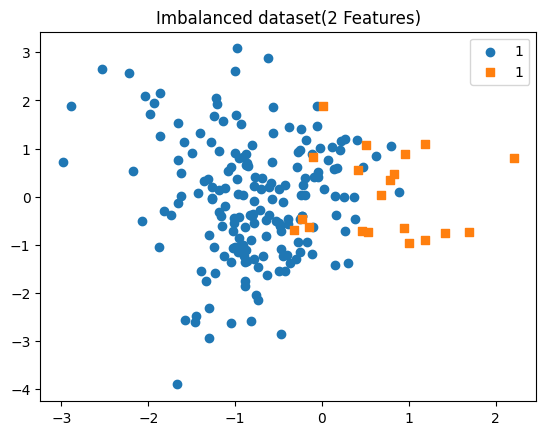

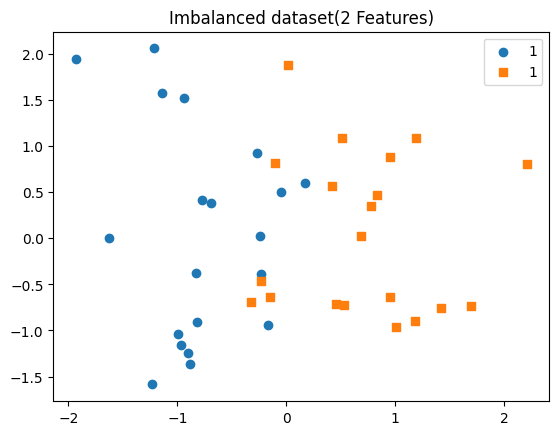

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)
plot_2d_space(X, y,'Imbalanced dataset(2 Features)')
plot_2d_space(X_rus, y_rus,'Imbalanced dataset(2 Features)')

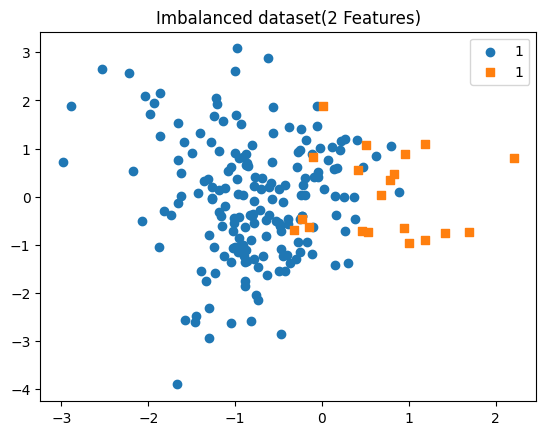

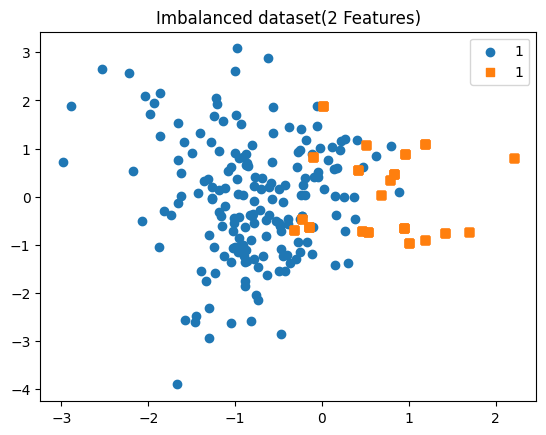

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
plot_2d_space(X, y,'Imbalanced dataset(2 Features)')
plot_2d_space(X_ros, y_ros,'Imbalanced dataset(2 Features)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


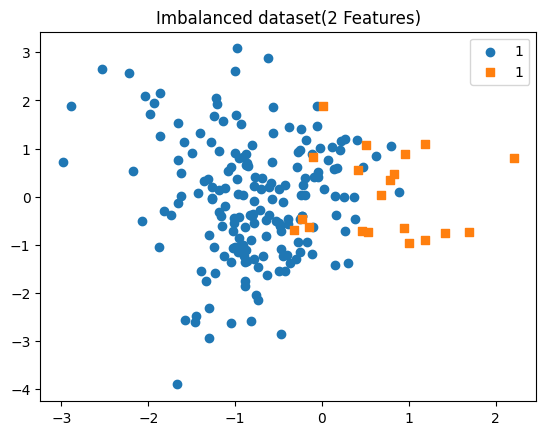

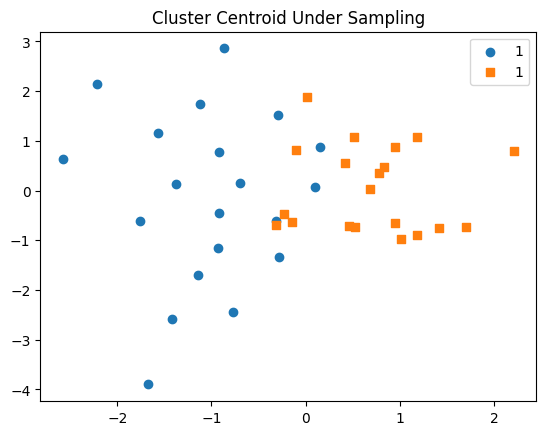

In [38]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy = {0:20})
X_cc, y_cc = cc.fit_resample(X,y)
plot_2d_space(X, y,'Imbalanced dataset(2 Features)')
plot_2d_space(X_cc, y_cc,'Cluster Centroid Under Sampling')

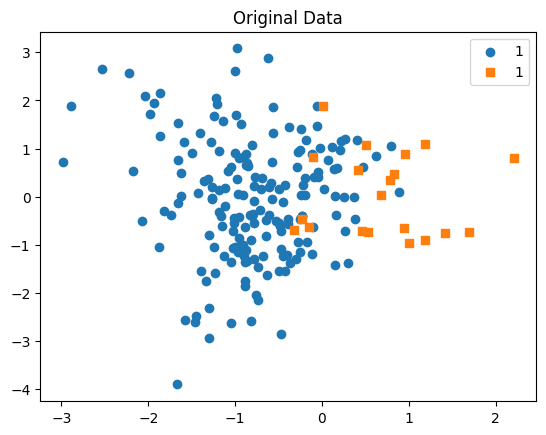

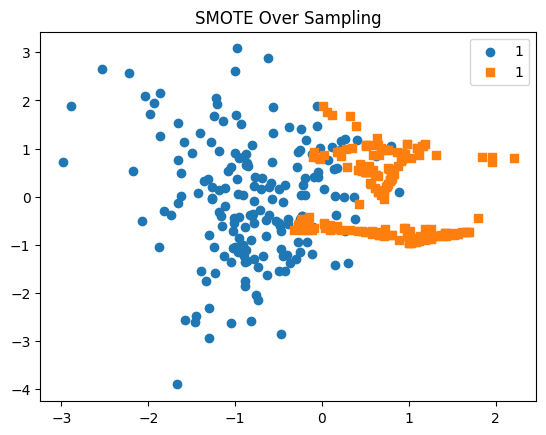

In [40]:
from imblearn.over_sampling import SMOTE
plot_2d_space(X,y,"Original Data")
smote = SMOTE(sampling_strategy ='minority')
X_sm, y_sm = smote.fit_resample(X,y)
plot_2d_space(X_sm,y_sm, "SMOTE Over Sampling")

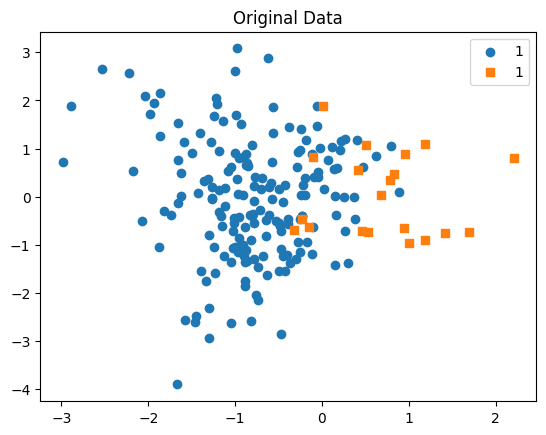

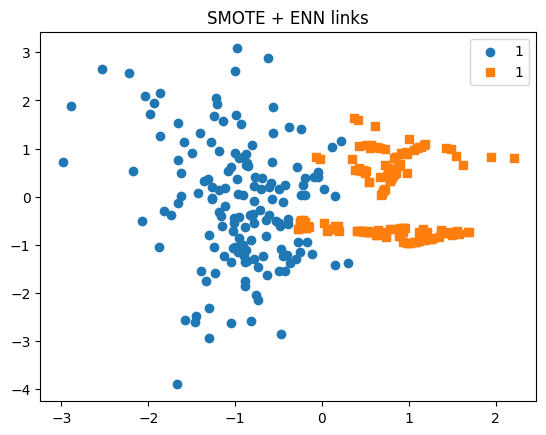

In [41]:
from imblearn.combine import SMOTEENN
plot_2d_space(X,y,"Original Data")
smt = SMOTEENN(sampling_strategy ='all')
X_smt, y_smt = smt.fit_resample(X,y)
plot_2d_space(X_smt,y_smt, "SMOTE + ENN links")

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_smt, y_smt)
lr.score(X_smt, y_smt)

print("AUROC on the sampled dataset :", roc_auc_score(y, lr.predict_proba(X)[:,1]))

AUROC on the sampled dataset : 0.9513888888888888
